In [71]:
import numpy as np
import matplotlib.pyplot as plt

### 1 Feedforward: Building a ReLU neural network   
Consider the rectified linear activation function : hj = max(0, aj ).
1. Draw a network with:   
• 2 inputs   
• 1 hidden layers with 4 hidden units and a   
• 1-class output (for binary classification)   

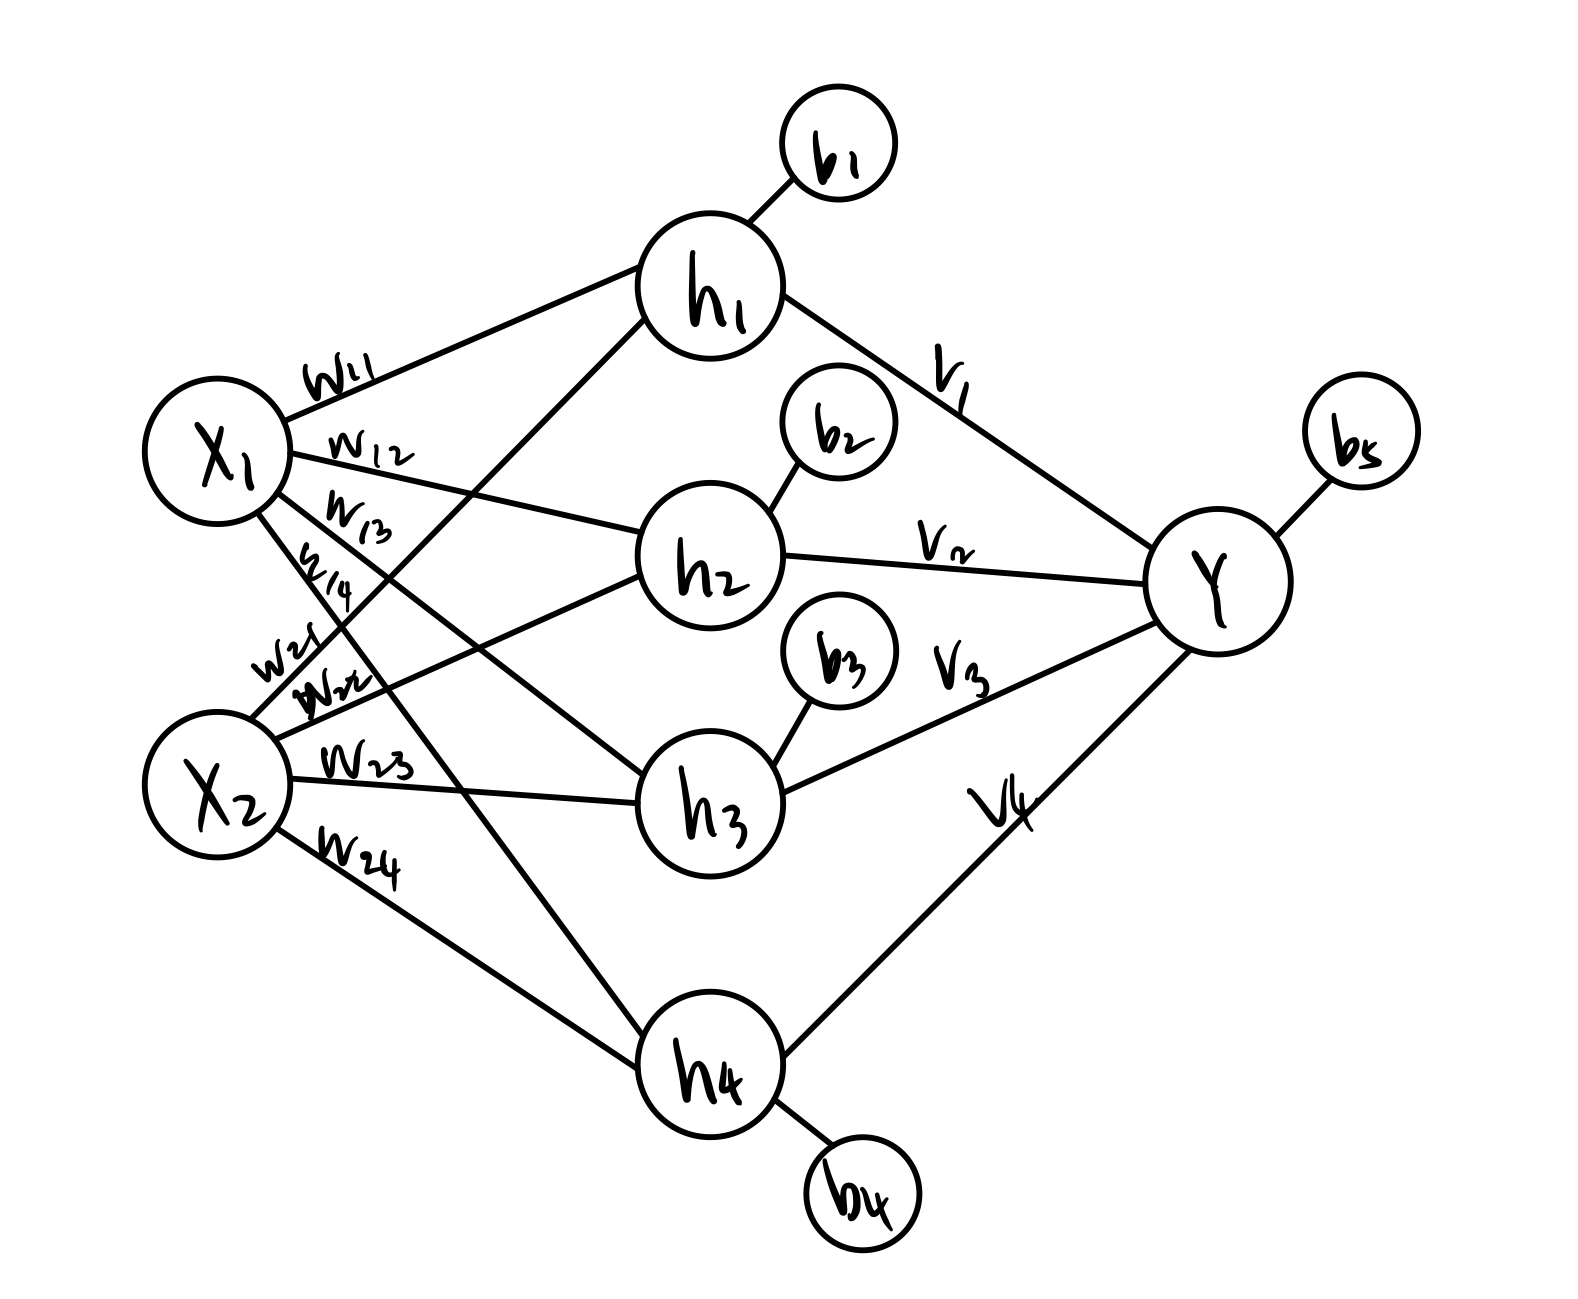

2. Write out the mathematical equation for the output of this network (feel
free to break the input-output relationship into multiple equations).

$h_1 = max[0, w_{11}X_1+w_{21}X_2+b_1]$  
$\vdots$    
$h_4 = max[0, w_{14}X_1+w_{24}X_2+b_4]$   
$$
W = \begin{bmatrix}w_{11} & w_{12} & w_{13} & w_{14}\\w_{21} & w_{22} & w_{23} & w_{24}\end{bmatrix},    
\vec{X} = \begin{bmatrix} X_1 & X_2 \end{bmatrix},    
\vec{b} = \begin{bmatrix} b_1 \\b_2\\b_3\\b_4\end{bmatrix}   
$$
Let $f(x)$ be the activation function, then   
$\vec{h} = max[0, \vec{X}W+\vec{b}]$

Let $g(x)$ be the output function, then
$Y = g(v_1h_1+v_2h_2+v_3h_3+v_4h_4+c)$   
$Y = g(\vec{v}^T\vec{h}+c)$

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [72]:
# basic relu function
def relu(x):
    return np.maximum(x,0)

def ff_nn_ReLu(X, W, b, v, c):
    # compute values of hidden layer
    a = np.dot(X, W)+b
    # change negative values to 0
    h = relu(a)
    # compute output layer value
    y_a = np.dot(h, v)+c
    # use sigmoid function for binary classification
    return 1 / (1 + np.exp(-y_a))

4. Suppose you're given a set of weight matrices, what are the class probabilities associated with the forward pass of each sample?

In [73]:
# pass in parameters
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = np.array([1])

In [74]:
# calculate output
print("Class probability for each sample: ", ff_nn_ReLu(X, W, b, v, c))

Class probability for each sample:  [0.81757448 0.62245933 0.62245933]


### 2 Gradient Descent

1. What are the partial derivatives of f with respect to x and to y?

$f(x, y) = (3-x^3)+50*(2y^2-x)^2$   

$\frac{\partial{f}}{\partial{x}} = -3x^2+50(2y^2-x)(-1)= -3x^2-50(2y^2-x)$   

$\frac{\partial{f}}{\partial{y}} = 2*50(2y^2-x)(4y) = 400y(2y^2-x)$

2. Create a visualization of the contours of this function.

In [75]:
# define function
def f(x, y):
    return (3-x**3)+50*(2*y**2-x)**2

Text(0, 0.5, 'y')

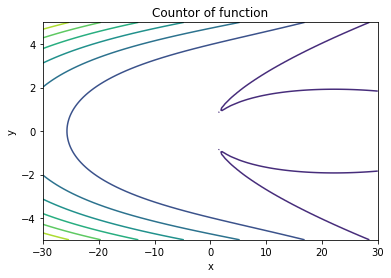

In [76]:
x = np.linspace(-30, 30, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig,ax=plt.subplots(1,1)
ax.contour(X, Y, Z)
plt.title("Countor of function")
plt.xlabel("x")
plt.ylabel("y")

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [77]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-100*(2*y**2-x)
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])

In [78]:
def grad_descent(starting_point=None, iterations=100, learning_rate=0.001):

    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    traj = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        traj.append(point)
    return np.array(traj)

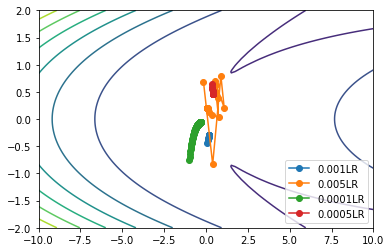

In [79]:
np.random.seed(100)
t1 = grad_descent()
t2 = grad_descent(learning_rate = 0.005)
t3 = grad_descent(learning_rate = 0.0001)
t4 = grad_descent(learning_rate = 0.0005)

x = np.linspace(-10, 10, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig,ax=plt.subplots(1,1)
ax.contour(X, Y, Z)
plt.plot(t1[:,0],t1[:,1],'-o', label = "0.001LR")
plt.plot(t2[:,0],t2[:,1],'-o', label = "0.005LR")
plt.plot(t3[:,0],t3[:,1],'-o', label = "0.0001LR")
plt.plot(t4[:,0],t4[:,1],'-o', label = "0.0005LR")

plt.legend(loc = 'lower right')


4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [80]:
def grad_descent_with_momentum(starting_point=None, iterations=100, alpha=.1, epsilon=0.01):
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    traj = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        traj.append(point)
        
    return np.array(traj)

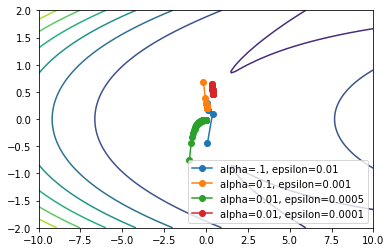

In [81]:
np.random.seed(100)
t1 = grad_descent_with_momentum()
t2 = grad_descent_with_momentum(alpha=0.1, epsilon=0.001)
t3 = grad_descent_with_momentum(alpha=0.01, epsilon=0.0005)
t4 = grad_descent_with_momentum(alpha=0.01, epsilon=0.0001)


x = np.linspace(-10, 10, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig,ax=plt.subplots(1,1)
ax.contour(X, Y, Z)
plt.plot(t1[:,0],t1[:,1],'-o', label = "alpha=.1, epsilon=0.01")
plt.plot(t2[:,0],t2[:,1],'-o', label = "alpha=0.1, epsilon=0.001")
plt.plot(t3[:,0],t3[:,1],'-o', label = "alpha=0.01, epsilon=0.0005")
plt.plot(t4[:,0],t4[:,1],'-o', label = "alpha=0.01, epsilon=0.0001")

plt.legend(loc = 'lower right')


### 3 Backprop

1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.

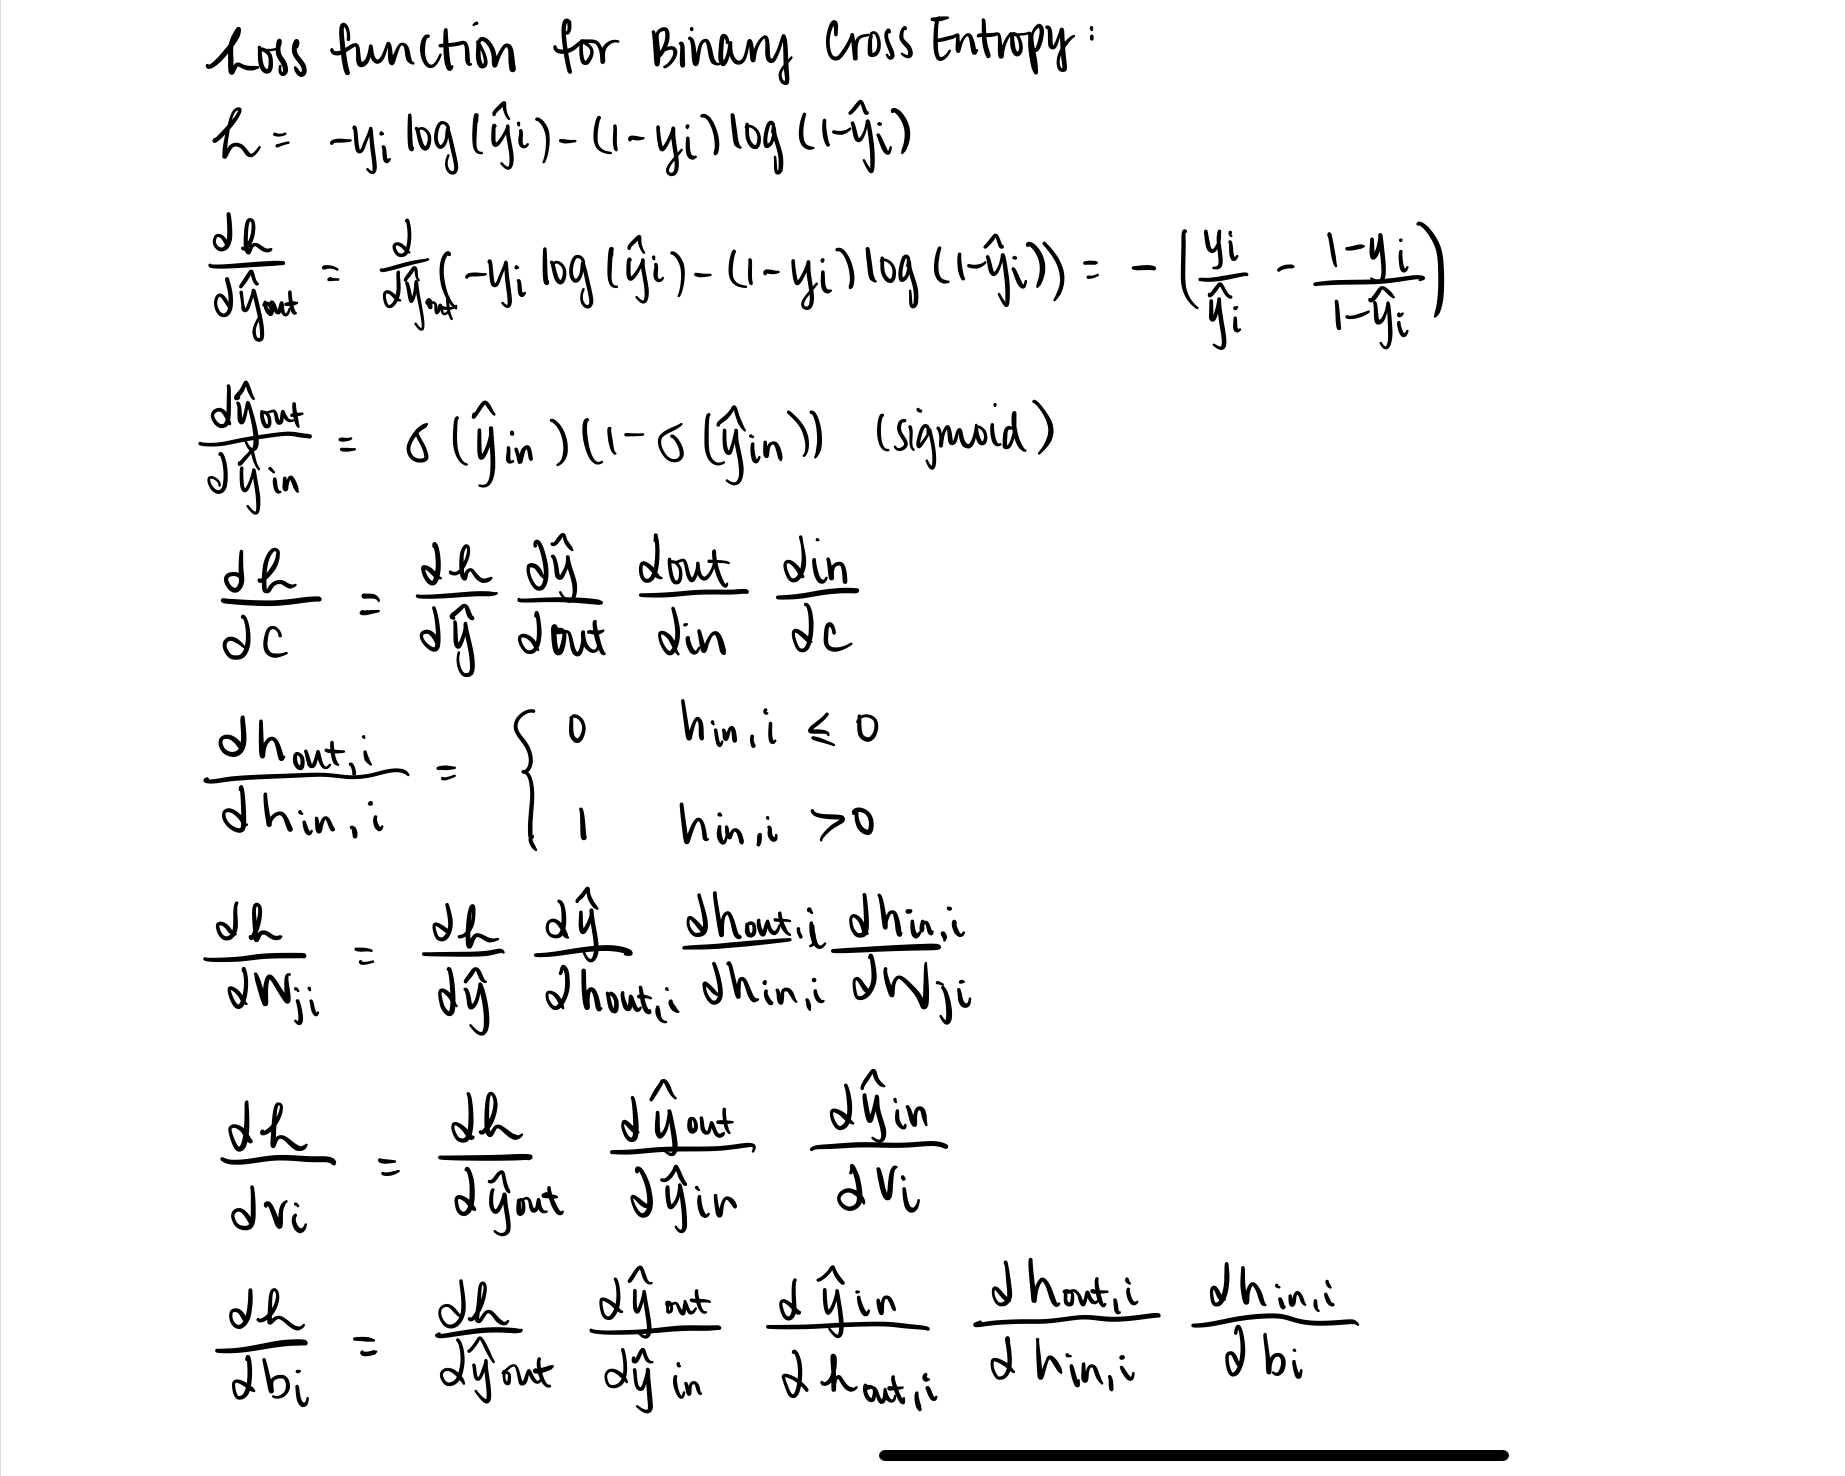

2. Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [82]:
def loss(y, y_hat):
    return np.sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))

def relu(x):
    return np.maximum(x,0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def grad_f(X, Y, W, v, b, c):
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = -(Y/y_hat-(1-Y)/(1-y_hat))*y_hat*(1-y_hat)
    dL_dv = np.dot(dL_dc.T, h).T
    dL_db = relu_derivative(a)*np.dot(-(Y/y_hat-(1-Y)/(1-y_hat)), v.T)
    dL_dw = np.dot(X.T, dL_db)
    
    return (dL_dw, dL_dv, dL_db, dL_dc, loss(Y, y_hat))


3. Generate a synthetic dataset like the XOR pattern (see below).

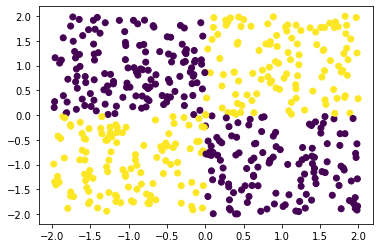

In [83]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

4. Fit your network using Gradient Descent. Keep track of the total Loss at
each iteration and plot the result.

In [84]:
def grad_descent(x, y, W, v, b, c, iterations=10000, learning_rate=1e-5):
    losses = []
    traj = []
    
    for i in range(iterations):
        dw, dv, db, dc, loss = grad_f(x, y, W, v, b, c)
        W = W - learning_rate * dw
        v = v - learning_rate * dv
        b = b - learning_rate * db
        c = c - learning_rate * dc
        
        traj.append(np.array([W, v, b, c]))
        losses.append(loss)
    return (np.array(traj), losses)

Text(0.5, 1.0, 'Loss Function over Iterations')

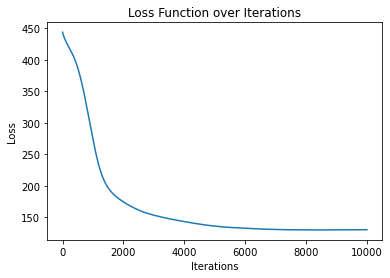

In [85]:
W = np.random.uniform(size=8).reshape(2, 4)
v = np.random.uniform(size=4).reshape(4, 1)
b = np.random.uniform(size=4).reshape(1, 4)
c = np.random.uniform(size=1).reshape(1)
y = y.reshape(500, 1)
traj, losses = grad_descent(x, y, W, v, b, c)
plt.plot(losses, '-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')

5. Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently.

In [ ]:
def grad_descent_momentum(x, y, W, v, b, c, iterations=100, alpha=1e-4, epsilon = 0.0001):
    losses = []
    traj = []
    v_w = np.array([np.zeros(W.shape)])
    v_v = np.array([np.zeros(v.shape)])
    v_b = np.array([np.zeros(b.shape)])
    v_c = np.array([np.zeros(c.shape)])

    for i in range(iterations):
        dw, dv, db, dc, loss = grad_f(x, y, W, v, b, c)
        v_w = alpha * v_w + epsilon * dw
        v_v = alpha * v_v + epsilon * dv
        v_b = alpha * v_b + epsilon * db
        v_c = alpha * v_c + epsilon * dc
        W = W - v_w
        v = v - v_v
        b = b - v_b
        c = c - v_c
        
        traj.append(np.array([W, v, b, c]))
        losses.append(loss)
    return (np.array(traj), losses)


In [ ]:
traj, losses = grad_descent_momentum(x, y, W, v, b, c)
plt.plot(losses, '-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations (Gradient Descent with Momentum)')

6. Plot a visualization of the final decision boundary that your model has
learned. Overlay the datapoints in this plot.

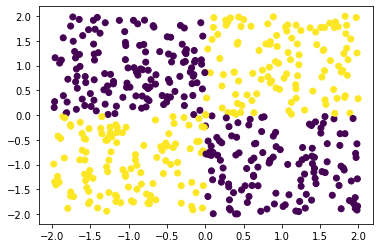

In [97]:
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)
X1, X2 = np.meshgrid(x1, x2)
x_in  = np.c_[X1.ravel(),X2.ravel()]
W, v, b, c = traj[-1]
#h = relu(np.dot(x_in, W)+b)
#y_hat = sigmoid(np.dot(h, v)+c)
#y_hat.reshape(X1.shape)
#fig, ax = plt.subplots()
#CS = ax.contourf(X1, X2, y_hat)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()